In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random

In [6]:
df = pd.read_csv('data/archive/ner_dataset.csv', encoding="latin-1")

In [7]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


# Visaulize POS & Tag

<AxesSubplot:xlabel='Tag', ylabel='count'>

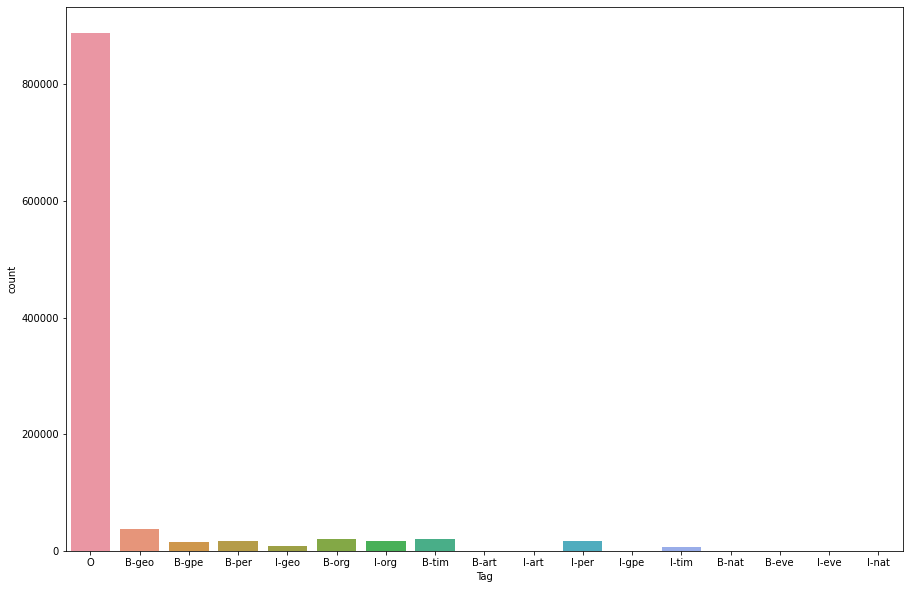

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Tag')

<AxesSubplot:xlabel='POS', ylabel='count'>

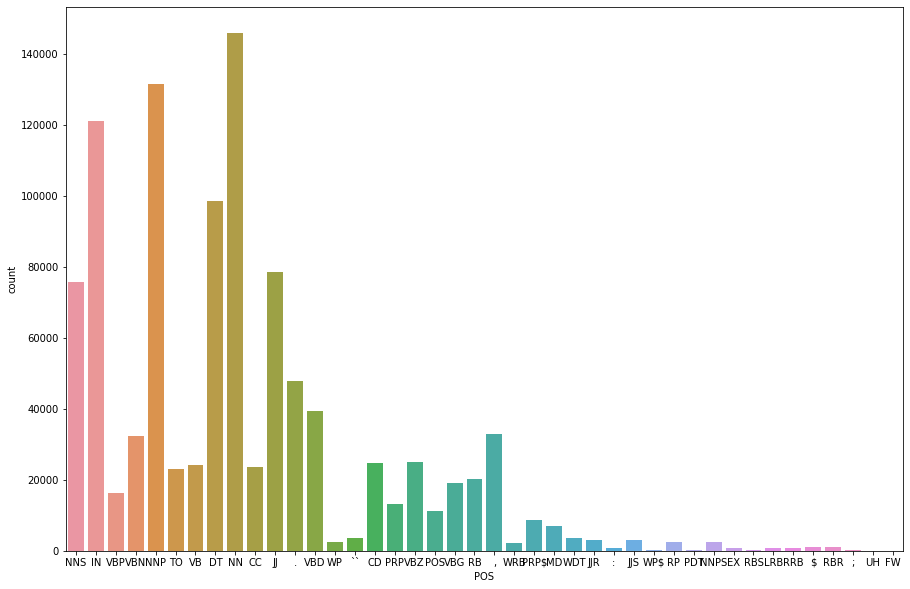

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='POS')

# Group sentences

In [19]:
df['Sentence #'] = df['Sentence #'].fillna(method="ffill")
df['POS_Encoded'] = LabelEncoder().fit_transform(df['POS'])
df['Tag_Encoded'] = LabelEncoder().fit_transform(df['Tag'])

In [32]:
sentences = df.groupby('Sentence #')["Word"].apply(list).values
pos = df.groupby('Sentence #')["POS"].apply(list).values
tag = df.groupby('Sentence #')["Tag"].apply(list).values
pos_encoded = df.groupby('Sentence #')["POS_Encoded"].apply(list).values
tag_encoded = df.groupby('Sentence #')["Tag_Encoded"].apply(list).values

In [37]:
random.choice(list(zip(sentences, pos, tag, pos_encoded, tag_encoded)))

(['Iraqi',
  'National',
  'Guard',
  'troops',
  'have',
  'raided',
  'a',
  'Sunni',
  'mosque',
  'in',
  'Baghdad',
  '.'],
 ['JJ',
  'NNP',
  'NNP',
  'NNS',
  'VBP',
  'VBN',
  'DT',
  'NNP',
  'NN',
  'IN',
  'NNP',
  '.'],
 ['B-gpe', 'B-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O'],
 [11, 17, 17, 19, 35, 34, 7, 17, 16, 10, 17, 2],
 [3, 5, 13, 16, 16, 16, 16, 16, 16, 16, 2, 16])